# Salary Predictions Based on Job Descriptions

In [1]:
#import required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [2]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [3]:
Train_df = pd.read_csv('Salaries.csv')
Train_df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
Train_df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
Train_df['discipline'].head(397)

0      B
1      B
2      B
3      B
4      B
      ..
392    A
393    A
394    A
395    A
396    A
Name: discipline, Length: 397, dtype: object

In [6]:
Train_df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [7]:
Train_df.duplicated().sum()

4

In [8]:
Train_df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
zero_sal = Train_df['salary']<=0
inval = Train_df[zero_sal]
inval

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [10]:
clean_train_df = Train_df.drop_duplicates()

In [11]:
clean_train_df = Train_df[Train_df.salary>0]

In [12]:
clean_train_df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [13]:
clean_train_df.shape

(397, 6)

In [14]:
clean_train_df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [15]:
clean_train_df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [16]:
clean_train_df['sex']= label_encoder.fit_transform(clean_train_df['sex'])

In [17]:
clean_train_df['rank']= label_encoder.fit_transform(clean_train_df['rank'])

In [18]:
clean_train_df['discipline']= label_encoder.fit_transform(clean_train_df['discipline'])

In [19]:
clean_train_df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

In [20]:
print('Salary Skewness:', clean_train_df.skew())

Salary Skewness: rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64


In [21]:
clean_train_df=clean_train_df.drop(['sex'], axis=1)

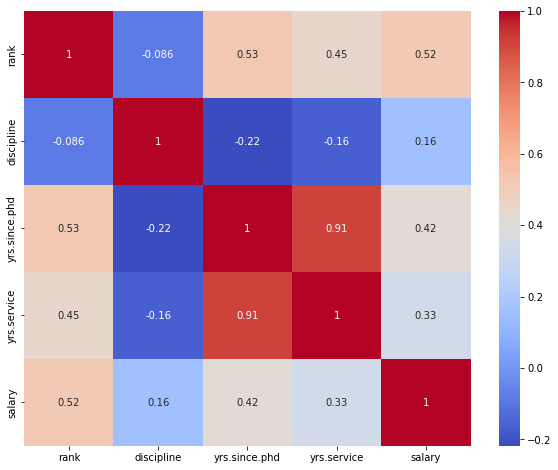

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(clean_train_df.corr(), cmap='coolwarm', annot=True);

<AxesSubplot:>

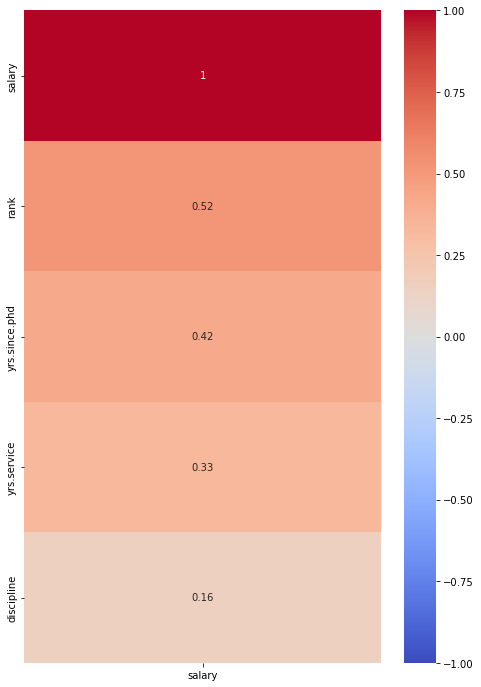

In [23]:
plt.figure(figsize=(8,12))
sns.heatmap(clean_train_df.corr()[['salary']].sort_values('salary', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

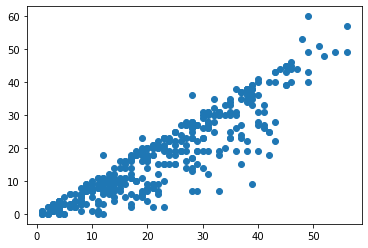

In [24]:
plt.scatter(clean_train_df['yrs.since.phd'], clean_train_df['yrs.service'])

Text(0.5, 1.0, 'Histogram for Salary')

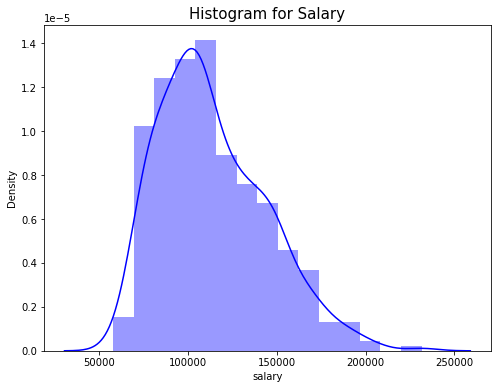

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(clean_train_df['salary'],kde = True , color ='blue')
plt.title('Histogram for Salary', fontsize=15)

In [27]:
data=clean_train_df

In [28]:
X = data.drop('salary',axis=1)
y = data['salary']

In [29]:
X.shape , y.shape

((397, 4), (397,))

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((317, 4), (80, 4), (317,), (80,))

In [31]:
X_train.shape

(317, 4)

In [32]:
Y_train.shape

(317,)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test , Y_test)

0.39312557546508187

In [50]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

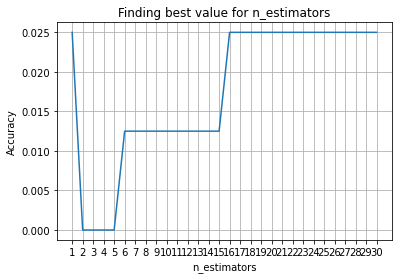

Highest value:  0.025


In [51]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [52]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [53]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [54]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [55]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [56]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [57]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [58]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [59]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 2.5
K Nearest neighbors: 2.5
Support Vector Classifier: 2.5
Naive Bayes: 1.25
Decision tree: 1.25
Random Forest: 1.25
